# Doctor Who EDA:
Dataset: https://www.kaggle.com/datasets/sujaykapadnis/doctor-who-tv-series-dataset/data?select=drwho_writers.csv


In [235]:
import pandas as pd

df = pd.read_csv("./drwho_episodes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   era              175 non-null    object 
 1   season_number    165 non-null    float64
 2   serial_title     6 non-null      object 
 3   story_number     175 non-null    object 
 4   episode_number   163 non-null    float64
 5   episode_title    175 non-null    object 
 6   type             175 non-null    object 
 7   first_aired      175 non-null    object 
 8   production_code  87 non-null     object 
 9   uk_viewers       175 non-null    float64
 10  rating           175 non-null    int64  
 11  duration         175 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 16.5+ KB


In [236]:
df.head()

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76,45
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76,44
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80,44
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82,45
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81,42


## Table of Contents
### Data Cleaning
- Handle Null Values
- Remove Duplicates
- Data Transformation
### Data Analysis

### Handle Null Values
Of the 11 columns, 4 of them have null values. We'll dive into why and what we should do to resolve this below. We'll need to resolve:
- season_number
- serial_title
- episode_number
- production_code

Season number null value

In [237]:
# Season Number
df.loc[df["season_number"].isnull()]

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration
55,revived,NaN,NaN,199,1.0,The Next Doctor,special,2008-12-25,4.14,13.10,86,60
56,revived,NaN,NaN,200,2.0,Planet of the Dead,special,2009-04-11,4.15,9.75,88,60
57,revived,NaN,NaN,201,3.0,The Waters of Mars,special,2009-11-15,4.16,10.32,88,60
58,revived,NaN,NaN,202a,4.0,The End of Time – Part One,special,2009-12-25,4.17,12.04,87,60
59,revived,NaN,NaN,202b,5.0,The End of Time – Part Two,special,2010-01-01,4.18,12.27,89,75
102,revived,NaN,NaN,240,1.0,The Day of the Doctor,special,2013-11-23,NaN,12.80,88,77
103,revived,NaN,NaN,241,2.0,The Time of the Doctor,special,2013-12-25,NaN,11.14,83,60
172,revived,NaN,NaN,298,1.0,Eve of the Daleks,special,2022-01-01,NaN,4.40,77,58
173,revived,NaN,NaN,299,2.0,Legend of the Sea Devils,special,2022-04-17,NaN,3.47,76,48
174,revived,NaN,NaN,300,3.0,The Power of the Doctor,special,2022-10-23,NaN,5.30,82,87


We can see here that each missing season number is a "special" episode. These episodes usually occur between seasons. We can simply assign a season number to each of these corresponding to the most recent season before it. I have a few reasons for this:
- Other specials are given season numbers in a similar way
- Usually specials in DW are the end of a season's story arc and pave the way to the next season
- Specials are big data points for the purposes of this project- they are usually higher budget and I hypothesize that they get more views. Removing them would impact our analysis.

I *could* do this manually by looking it up and inserting each value by hand... But let's have some fun with some dataframe operations.

In [238]:
df["season_number"].ffill(inplace=True)

C:\Users\ghubb\AppData\Local\Temp\ipykernel_14040\2454369190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["season_number"].ffill(inplace=True)


Serial title null values

We don't need serial number, so we'll just be removing it. Only a few entries even us it anyway.

In [239]:
df.drop("serial_title", inplace=True, axis=1)

Episode number

In [240]:
df.loc[df["episode_number"].isnull()]

,era,season_number,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration
13,revived,2.0,167,NaN,The Christmas Invasion,special,2005-12-25,2X,9.84,84,60
27,revived,3.0,178,NaN,The Runaway Bride,special,2006-12-25,3X,9.35,84,60
41,revived,4.0,188,NaN,Voyage of the Damned,special,2007-12-25,4X,13.31,86,72
73,revived,6.0,213,NaN,A Christmas Carol,special,2010-12-25,2.X,12.11,83,60
87,revived,7.0,225,NaN,"The Doctor, the Widow and the Wardrobe",special,2011-12-25,NaN,10.77,84,60
93,revived,7.0,231,NaN,The Snowmen,special,2012-12-25,NaN,9.87,87,60
116,revived,9.0,253,NaN,Last Christmas,special,2014-12-25,NaN,8.28,82,60
129,revived,9.0,263,NaN,The Husbands of River Song,special,2015-12-25,NaN,7.69,82,56
130,revived,10.0,264,NaN,The Return of Doctor Mysterio,special,2016-12-25,NaN,7.83,82,60
143,revived,10.0,276,NaN,Twice Upon a Time,special,2017-12-25,NaN,7.92,81,60


Once again, these are specials, specifically one that only have one part to them. The other specials that were in the database had an episode number when they had several parts to them. We'll give all of these the episode number 1.0 to stay in line with that convention.

In [241]:
df.fillna({"episode_number": 1.0}, inplace=True)

production code

Once again, we don't care about this. It's better to just remove it.

In [242]:
df.drop("production_code", inplace=True, axis=1)

### Remove Duplicates

Episode title is a good indicator of uniqueness- we can just check that

In [243]:
df.nunique()

era                 1
season_number      13
story_number      175
episode_number     13
episode_title     175
type                2
first_aired       175
uk_viewers        154
rating             16
duration           29
dtype: int64

175 unique episode titles means we don't have to do anything here!

### Data Transformation

In [244]:
df.head()

,era,season_number,story_number,episode_number,episode_title,type,first_aired,uk_viewers,rating,duration
0,revived,1.0,157,1.0,Rose,episode,2005-03-26,10.81,76,45
1,revived,1.0,158,2.0,The End of the World,episode,2005-04-02,7.97,76,44
2,revived,1.0,159,3.0,The Unquiet Dead,episode,2005-04-09,8.86,80,44
3,revived,1.0,160a,4.0,Aliens of London,episode,2005-04-16,7.63,82,45
4,revived,1.0,160b,5.0,World War Three,episode,2005-04-23,7.98,81,42


Episode number should be an integer, let's cast that.

In [245]:
df["episode_number"] = df["episode_number"].astype(int)
df.head()

,era,season_number,story_number,episode_number,episode_title,type,first_aired,uk_viewers,rating,duration
0,revived,1.0,157,1,Rose,episode,2005-03-26,10.81,76,45
1,revived,1.0,158,2,The End of the World,episode,2005-04-02,7.97,76,44
2,revived,1.0,159,3,The Unquiet Dead,episode,2005-04-09,8.86,80,44
3,revived,1.0,160a,4,Aliens of London,episode,2005-04-16,7.63,82,45
4,revived,1.0,160b,5,World War Three,episode,2005-04-23,7.98,81,42


In [246]:
df.tail()

,era,season_number,story_number,episode_number,episode_title,type,first_aired,uk_viewers,rating,duration
170,revived,13.0,297e,5,Survivors of the Flux,episode,2021-11-28,4.83,77,50
171,revived,13.0,297f,6,The Vanquishers,episode,2021-12-05,4.64,76,59
172,revived,13.0,298,1,Eve of the Daleks,special,2022-01-01,4.40,77,58
173,revived,13.0,299,2,Legend of the Sea Devils,special,2022-04-17,3.47,76,48
174,revived,13.0,300,3,The Power of the Doctor,special,2022-10-23,5.30,82,87


### Data Analysis

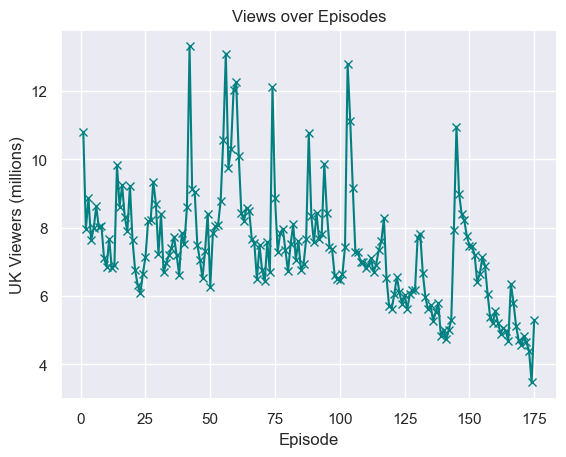

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme()

#fig, axs = plt.subplots(2,1)
#axs[0].plot(df["first_aired"].to_list(),df["uk_viewers"].to_list())
#axs[1].plot(np.linspace(1,175,175),df["uk_viewers"].to_list())

plt.plot(np.linspace(1,175,175),df["uk_viewers"].to_list(),marker='x',c="teal")
plt.title("Views over Episodes")
plt.ylabel("UK Viewers (millions)")
plt.xlabel("Episode")
plt.show()

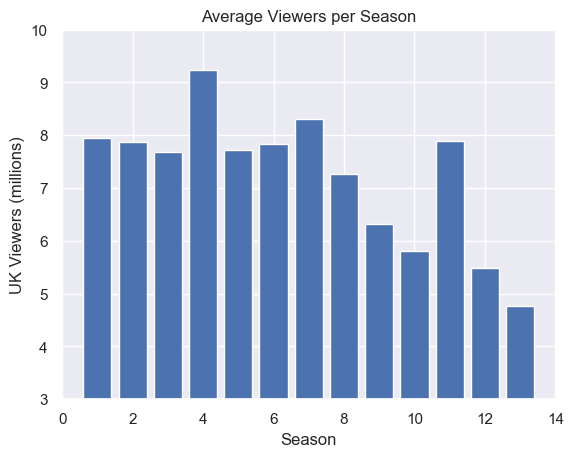

In [248]:
pivot_table = df.pivot_table(
    values=["uk_viewers"],
    index=["season_number"]
)

plt.bar(np.linspace(1,13,13),pivot_table["uk_viewers"].to_list())
plt.title("Average Viewers per Season")
plt.ylabel("UK Viewers (millions)")
plt.xlabel("Season")
plt.ylim((3,10))
plt.show()

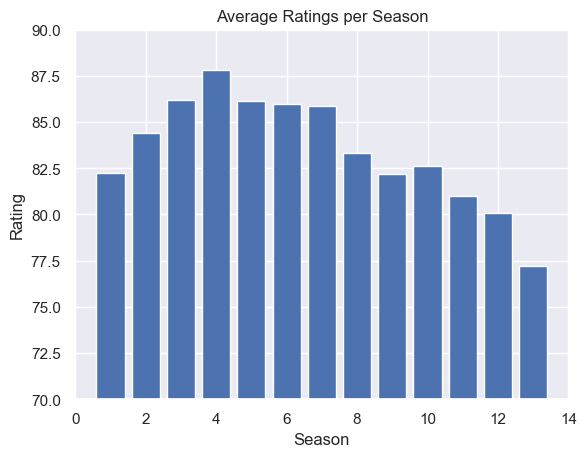

,rating
season_number,
1.0,82.230769
2.0,84.428571
3.0,86.214286
4.0,87.842105
5.0,86.153846
6.0,86.000000
7.0,85.882353
8.0,83.333333
9.0,82.214286


In [249]:
pivot_table = df.pivot_table(
    values=["rating"],
    index=["season_number"]
)

plt.bar(np.linspace(1,13,13),pivot_table["rating"].to_list())
plt.title("Average Ratings per Season")
plt.ylabel("Rating")
plt.xlabel("Season")
plt.ylim((70,90))
plt.show()
pivot_table.head(13)

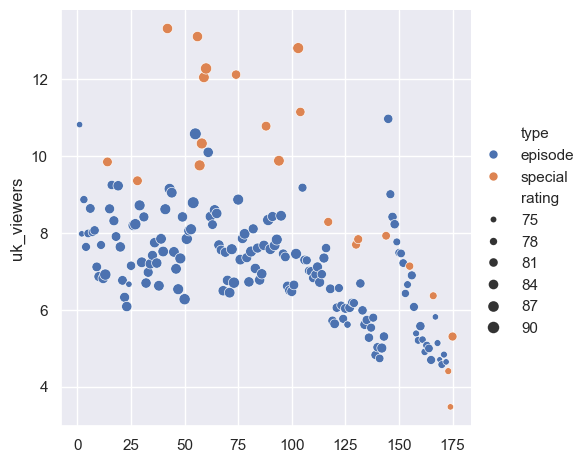

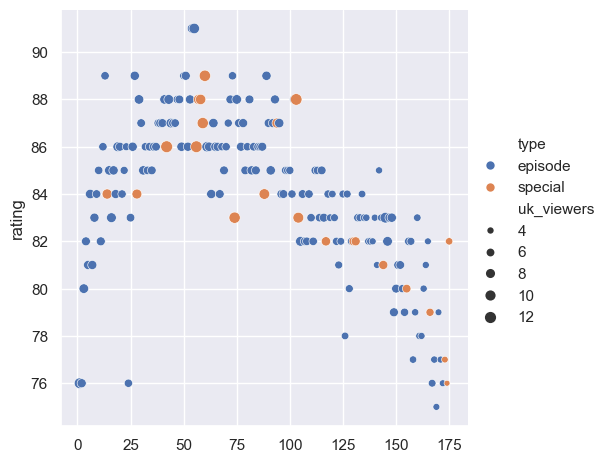

In [250]:
sns.relplot(
    data = df,
    x=np.linspace(1,175,175),
    y='uk_viewers',
    hue='type',
    size='rating'
)

sns.relplot(
    data = df,
    x=np.linspace(1,175,175),
    y='rating',
    hue='type',
    size='uk_viewers'
)

In [251]:
df.nlargest(10, "uk_viewers")

,era,season_number,story_number,episode_number,episode_title,type,first_aired,uk_viewers,rating,duration
41,revived,4.0,188,1,Voyage of the Damned,special,2007-12-25,13.31,86,72
55,revived,4.0,199,1,The Next Doctor,special,2008-12-25,13.10,86,60
102,revived,7.0,240,1,The Day of the Doctor,special,2013-11-23,12.80,88,77
59,revived,4.0,202b,5,The End of Time – Part Two,special,2010-01-01,12.27,89,75
73,revived,6.0,213,1,A Christmas Carol,special,2010-12-25,12.11,83,60
58,revived,4.0,202a,4,The End of Time – Part One,special,2009-12-25,12.04,87,60
103,revived,7.0,241,2,The Time of the Doctor,special,2013-12-25,11.14,83,60
144,revived,11.0,277,1,The Woman Who Fell to Earth,episode,2018-10-07,10.96,83,64
0,revived,1.0,157,1,Rose,episode,2005-03-26,10.81,76,45
87,revived,7.0,225,1,"The Doctor, the Widow and the Wardrobe",special,2011-12-25,10.77,84,60


In [252]:
df.nlargest(10, "rating")

,era,season_number,story_number,episode_number,episode_title,type,first_aired,uk_viewers,rating,duration
53,revived,4.0,198a,12,The Stolen Earth,episode,2008-06-28,8.78,91,45
54,revived,4.0,198b,13,Journey's End,episode,2008-07-05,10.57,91,63
12,revived,1.0,166b,13,The Parting of the Ways,episode,2005-06-18,6.91,89,45
26,revived,2.0,177b,13,Doomsday,episode,2006-07-08,8.22,89,45
49,revived,4.0,195a,8,Silence in the Library,episode,2008-05-31,6.27,89,45
50,revived,4.0,195b,9,Forest of the Dead,episode,2008-06-07,7.84,89,45
59,revived,4.0,202b,5,The End of Time – Part Two,special,2010-01-01,12.27,89,75
72,revived,5.0,212b,13,The Big Bang,episode,2010-06-26,6.70,89,55
88,revived,7.0,226,1,Asylum of the Daleks,episode,2012-09-01,8.33,89,50
28,revived,3.0,179,1,Smith and Jones,episode,2007-03-31,8.71,88,45


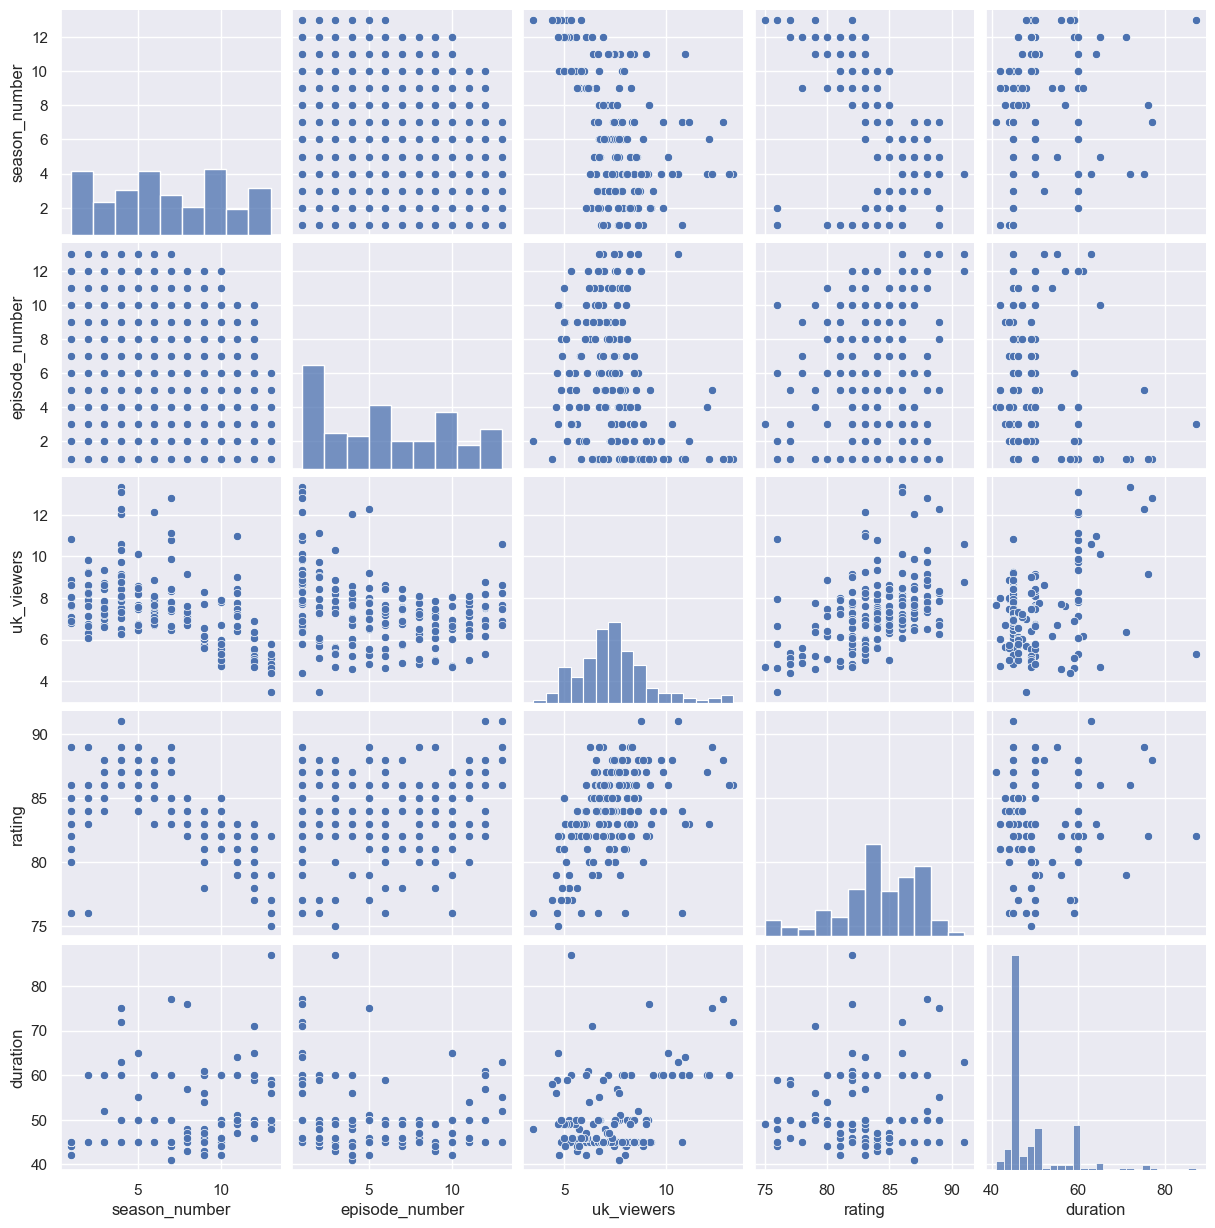

In [253]:
sns.pairplot(df)